<a href="https://colab.research.google.com/github/Mega-737/Mega-737-Challenge-Telecom_X-Churn-de-Clientes/blob/main/Challenge__TelecomX__Churn_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formação: Aprendendo a fazer ETL G8 - ONEAlura
---
### `Challenge Telecom_X: Análise De Evasão De Clientes`

💡**DESAFIO**💡

Aplicar habilidades essenciais de Análise De Dados em um Cenário De Negócios Real.

`Projeto: CHURN DE CLIENTES`

## 💻 1. Extração dos Dados

1. Importar as bibliotecas
2. Carregar os dados diretamente da API utilizando Python. Diretamente do GitHub
3. Converter os dados para um DataFrame do Pandas para facilitar a manipulação
4. Duplicar o banco de dados: df_original e df_trabalho
5. Print de teste.

In [ ]:
# 1.1. Importar bibliotecas necessárias
import pandas as pd
import json
import requests
from tabulate import tabulate
import matplotlib.pyplot as plt  # https://matplotlib.org/stable/index.html
import seaborn as sns   # https://seaborn.pydata.org/
from tabulate import tabulate
import json
import warnings
from google.colab import files

# 1.2. Carregar o JSON diretamente do GitHub
url_github = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
response = requests.get(url_github)

# 1.3. Validar o carregamento
if response.status_code == 200:
    data = response.json()
    # Normalizar o JSON para DataFrame (desaninhando as colunas internas)
    df_original = pd.json_normalize(data)
    print("Dados carregados e normalizados com sucesso.")
else:
    print("Erro ao carregar o JSON:", response.status_code)

# 1.4. Duplicar o dataframe para manipulação
df_trabalho = df_original.copy()

# 1.5.1. Exibir os primeiros registros de df_original
print("DF Original (5 primeiras linhas):")
print(tabulate(df_original.head(), headers='keys', tablefmt='fancy_grid'))

#1.5.1. Exibir os primeiros registros de df_trabalho
print("\nDF Trabalho (5 primeiras linhas)")
print(tabulate(df_trabalho.head(), headers='keys', tablefmt='fancy_grid'))


Dados carregados e normalizados com sucesso.
DF Original (5 primeiras linhas):
╒════╤══════════════╤═════════╤═══════════════════╤══════════════════════════╤════════════════════╤═══════════════════════╤═══════════════════╤══════════════════════╤═══════════════════════╤════════════════════════════╤═══════════════════════════╤═════════════════════════╤═════════════════════════════╤════════════════════════╤════════════════════════╤════════════════════════════╤════════════════════╤════════════════════════════╤═════════════════════════╤═══════════════════════════╤═════════════════════════╕
│    │ customerID   │ Churn   │ customer.gender   │   customer.SeniorCitizen │ customer.Partner   │ customer.Dependents   │   customer.tenure │ phone.PhoneService   │ phone.MultipleLines   │ internet.InternetService   │ internet.OnlineSecurity   │ internet.OnlineBackup   │ internet.DeviceProtection   │ internet.TechSupport   │ internet.StreamingTV   │ internet.StreamingMovies   │ account.Contract   │ acco

## ⚙️ 2. Transformação

`Conhecendo o Dataset`
1. Reconhecimento do Dataset: Estrutura e Colunas
2. Verificar total de colunas, linhas e nomes
3. Padronizar todas as colunas para MAIÚSCULAS
4. Print teste em planilha
5. Padronização das planilhas

In [ ]:
# 2.1. Visualizar informações gerais do DataFrame
print(">> Informações do df_trabalho:\n")
print(df_trabalho.info())

# 2.2. Visualizar dimensões
print(f"\nQuantidade de linhas: {df_trabalho.shape[0]}")
print(f"Quantidade de colunas: {df_trabalho.shape[1]}")

# 2.2.1. Exibir nomes das colunas antes da padronização
print("\nNomes das colunas antes da padronização:")
print(df_trabalho.columns.tolist())

# 2.3. Padronizar todas as colunas para MAIÚSCULAS
df_trabalho.columns = df_trabalho.columns.str.upper()

# 2.4. Exibir nomes das colunas depois da padronização
print("\nNomes das colunas após a padronização:")
print(df_trabalho.columns.tolist())

>> Informações do df_trabalho:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSup

In [ ]:
# 2.5. Patronização das colunas
from tabulate import tabulate

print("Visualização de df_trabalho após a padronização de colunas:")
print(tabulate(df_trabalho.head(), headers='keys', tablefmt='fancy_grid'))

Visualização de df_trabalho após a padronização de colunas:
╒════╤══════════════╤═════════╤═══════════════════╤══════════════════════════╤════════════════════╤═══════════════════════╤═══════════════════╤══════════════════════╤═══════════════════════╤════════════════════════════╤═══════════════════════════╤═════════════════════════╤═════════════════════════════╤════════════════════════╤════════════════════════╤════════════════════════════╤════════════════════╤════════════════════════════╤═════════════════════════╤═══════════════════════════╤═════════════════════════╕
│    │ CUSTOMERID   │ CHURN   │ CUSTOMER.GENDER   │   CUSTOMER.SENIORCITIZEN │ CUSTOMER.PARTNER   │ CUSTOMER.DEPENDENTS   │   CUSTOMER.TENURE │ PHONE.PHONESERVICE   │ PHONE.MULTIPLELINES   │ INTERNET.INTERNETSERVICE   │ INTERNET.ONLINESECURITY   │ INTERNET.ONLINEBACKUP   │ INTERNET.DEVICEPROTECTION   │ INTERNET.TECHSUPPORT   │ INTERNET.STREAMINGTV   │ INTERNET.STREAMINGMOVIES   │ ACCOUNT.CONTRACT   │ ACCOUNT.PAPERLESSBILLIN

`Inconsistências nos Dados`
1. Tratamento de Inconsistências: valores ausentes, duplicados, erros de formatação e inconsistências nas categorias.
2. Garantir que colunas numéricas estejam como inteiros

In [ ]:
# 2.1. Verificar valores ausentes
print(">> Verificação de valores ausentes:\n")
print(df_trabalho.isnull().sum())

# 2.1.1. Verificar linhas duplicadas
duplicados = df_trabalho.duplicated().sum()
print(f"\n>> Quantidade de linhas duplicadas: {duplicados}")

# 2.1.2. Normalizar as colunas numéricas para tipo float (ideal para cálculos)
df_trabalho['ACCOUNT.CHARGES.MONTHLY'] = pd.to_numeric(df_trabalho['ACCOUNT.CHARGES.MONTHLY'], errors='coerce')
df_trabalho['ACCOUNT.CHARGES.TOTAL'] = pd.to_numeric(df_trabalho['ACCOUNT.CHARGES.TOTAL'], errors='coerce')

# 2.2.1. Conferir os tipos após conversão
print("\nTipos de dados após conversão das colunas numéricas:")
print(df_trabalho[['ACCOUNT.CHARGES.MONTHLY', 'ACCOUNT.CHARGES.TOTAL']].dtypes)

#2.2.2. Visualizar os primeiros valores convertidos
print("\nVisualização dos valores numéricos convertidos:")
print(tabulate(df_trabalho[['ACCOUNT.CHARGES.MONTHLY', 'ACCOUNT.CHARGES.TOTAL']].head(), headers='keys', tablefmt='fancy_grid'))

>> Verificação de valores ausentes:

CUSTOMERID                   0
CHURN                        0
CUSTOMER.GENDER              0
CUSTOMER.SENIORCITIZEN       0
CUSTOMER.PARTNER             0
CUSTOMER.DEPENDENTS          0
CUSTOMER.TENURE              0
PHONE.PHONESERVICE           0
PHONE.MULTIPLELINES          0
INTERNET.INTERNETSERVICE     0
INTERNET.ONLINESECURITY      0
INTERNET.ONLINEBACKUP        0
INTERNET.DEVICEPROTECTION    0
INTERNET.TECHSUPPORT         0
INTERNET.STREAMINGTV         0
INTERNET.STREAMINGMOVIES     0
ACCOUNT.CONTRACT             0
ACCOUNT.PAPERLESSBILLING     0
ACCOUNT.PAYMENTMETHOD        0
ACCOUNT.CHARGES.MONTHLY      0
ACCOUNT.CHARGES.TOTAL        0
dtype: int64

>> Quantidade de linhas duplicadas: 0

Tipos de dados após conversão das colunas numéricas:
ACCOUNT.CHARGES.MONTHLY    float64
ACCOUNT.CHARGES.TOTAL      float64
dtype: object

Visualização dos valores numéricos convertidos:
╒════╤═══════════════════════════╤═════════════════════════╕
│    │   ACC

`Tratando as Inconsistências`

In [ ]:
# 2.1. Verificar tipos de dados e valores únicos por coluna
for col in df_trabalho.columns:
    print(f"\nColuna: {col}")
    print("Tipo de dado:", df_trabalho[col].dtype)
    if df_trabalho[col].dtype == 'object':
        print("Valores únicos:", df_trabalho[col].unique())
    else:
        print("Estatísticas descritivas:")
        print(df_trabalho[col].describe())


Coluna: CUSTOMERID
Tipo de dado: object
Valores únicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: CHURN
Tipo de dado: object
Valores únicos: ['No' 'Yes' '']

Coluna: CUSTOMER.GENDER
Tipo de dado: object
Valores únicos: ['Female' 'Male']

Coluna: CUSTOMER.SENIORCITIZEN
Tipo de dado: int64
Estatísticas descritivas:
count    7267.000000
mean        0.162653
std         0.369074
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: CUSTOMER.SENIORCITIZEN, dtype: float64

Coluna: CUSTOMER.PARTNER
Tipo de dado: object
Valores únicos: ['Yes' 'No']

Coluna: CUSTOMER.DEPENDENTS
Tipo de dado: object
Valores únicos: ['Yes' 'No']

Coluna: CUSTOMER.TENURE
Tipo de dado: int64
Estatísticas descritivas:
count    7267.000000
mean       32.346498
std        24.571773
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: CUSTOMER.TENURE, dt

`Coluna de Contas Diárias`
1. Criar conta "Conta_Diária: ACCOUNT.DAILY.ACCOUNT

-  Coluna: ACCOUNT.CHARGES.MONTHLY – criado a categoria: ACCOUNT.DAILY.ACCOUNT utilizando o cálculo: valor mensal / 30.

In [ ]:
# 2.1. Preencher valores nulos em ACCOUNT.CHARGES.TOTAL com zero sem warnings
df_trabalho['ACCOUNT.CHARGES.TOTAL'] = df_trabalho['ACCOUNT.CHARGES.TOTAL'].fillna(0)

# 2.1.1. Conferir se ainda há valores nulos
print("Verificação de valores ausentes após preenchimento:")
print(df_trabalho.isnull().sum())

# 2.1.2. Visualização dos primeiros registros para validação
print("\nVisualização das primeiras linhas após tratamento de valores nulos:")
print(tabulate(df_trabalho[['ACCOUNT.CHARGES.MONTHLY', 'ACCOUNT.CHARGES.TOTAL']].head(), headers='keys', tablefmt='fancy_grid'))

Verificação de valores ausentes após preenchimento:
CUSTOMERID                   0
CHURN                        0
CUSTOMER.GENDER              0
CUSTOMER.SENIORCITIZEN       0
CUSTOMER.PARTNER             0
CUSTOMER.DEPENDENTS          0
CUSTOMER.TENURE              0
PHONE.PHONESERVICE           0
PHONE.MULTIPLELINES          0
INTERNET.INTERNETSERVICE     0
INTERNET.ONLINESECURITY      0
INTERNET.ONLINEBACKUP        0
INTERNET.DEVICEPROTECTION    0
INTERNET.TECHSUPPORT         0
INTERNET.STREAMINGTV         0
INTERNET.STREAMINGMOVIES     0
ACCOUNT.CONTRACT             0
ACCOUNT.PAPERLESSBILLING     0
ACCOUNT.PAYMENTMETHOD        0
ACCOUNT.CHARGES.MONTHLY      0
ACCOUNT.CHARGES.TOTAL        0
dtype: int64

Visualização das primeiras linhas após tratamento de valores nulos:
╒════╤═══════════════════════════╤═════════════════════════╕
│    │   ACCOUNT.CHARGES.MONTHLY │   ACCOUNT.CHARGES.TOTAL │
╞════╪═══════════════════════════╪═════════════════════════╡
│  0 │                      65.6

`Padronização e Transformação de Dados`

**Conversões Binárias**
1. Conversão geral de 'Yes' para 1 e 'No' para 0 em todas as colunas
2. Substituir 'No internet service' e 'No phone service' = 0
3. Conversão binária para variável EVASÃO, CHURN sempre = 1
A evasão, churn em relação a qualquer variável, parâmetro sempre será = 1 negativo.
4. Criar coluna Categoria_Cliente: Cliente.Ativo e Clinte.Evasão
5. Criar Coluna ACCOUNT.CONTRACT: One Year = 12; Month to Month = 1; Tho Year = 24. Categoria de Contrato, Valor em Meses e Interpretação.

In [ ]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

# 2.1. Conversão geral de 'Yes' para 1 e 'No' para 0 em todas as colunas
df_trabalho.replace({'Yes': 1, 'No': 0}, inplace=True)

print("Conversão geral de 'Yes' e 'No' realizada.")

# 2.2. Substituir 'No internet service' e 'No phone service' por 0
df_trabalho.replace({'No internet service': 0, 'No phone service': 0}, inplace=True)

print("Substituição de 'No internet service' e 'No phone service' por 0 realizada.")

# 2.3.1. Garantir que CHURN esteja binário (precaução)
df_trabalho['CHURN'] = df_trabalho['CHURN'].apply(lambda x: 1 if x == 1 else 0)

# 2.4. Criar coluna Categoria_Cliente
df_trabalho['CATEGORIA_CLIENTE'] = df_trabalho['CHURN'].apply(lambda x: 'Cliente.Evasao' if x == 1 else 'Cliente.Ativo')

print("Conversão binária de CHURN e criação da coluna CATEGORIA_CLIENTE realizada.")
print(tabulate(df_trabalho[['CHURN', 'CATEGORIA_CLIENTE']].head(), headers='keys', tablefmt='fancy_grid'))

# 2.3.2. Criar coluna EVASAO igual à coluna CHURN
# Onde CHURN = 1, o cliente cancelou o serviço (evasão)
df_trabalho['EVASAO'] = df_trabalho['CHURN'].apply(lambda x: 1 if x == 1 else 0)

print("Coluna EVASAO criada com base em CHURN.")
print(tabulate(df_trabalho[['CHURN', 'EVASAO']].head(), headers='keys', tablefmt='fancy_grid'))

Conversão geral de 'Yes' e 'No' realizada.
Substituição de 'No internet service' e 'No phone service' por 0 realizada.
Conversão binária de CHURN e criação da coluna CATEGORIA_CLIENTE realizada.
╒════╤═════════╤═════════════════════╕
│    │   CHURN │ CATEGORIA_CLIENTE   │
╞════╪═════════╪═════════════════════╡
│  0 │       0 │ Cliente.Ativo       │
├────┼─────────┼─────────────────────┤
│  1 │       0 │ Cliente.Ativo       │
├────┼─────────┼─────────────────────┤
│  2 │       1 │ Cliente.Evasao      │
├────┼─────────┼─────────────────────┤
│  3 │       1 │ Cliente.Evasao      │
├────┼─────────┼─────────────────────┤
│  4 │       1 │ Cliente.Evasao      │
╘════╧═════════╧═════════════════════╛
Coluna EVASAO criada com base em CHURN.
╒════╤═════════╤══════════╕
│    │   CHURN │   EVASAO │
╞════╪═════════╪══════════╡
│  0 │       0 │        0 │
├────┼─────────┼──────────┤
│  1 │       0 │        0 │
├────┼─────────┼──────────┤
│  2 │       1 │        1 │
├────┼─────────┼──────────┤
│  3 │

In [ ]:
# 2.5.1. Criar nova coluna com valor em meses
df_trabalho['ACCOUNT.CONTRACT.MONTHS'] = df_trabalho['ACCOUNT.CONTRACT'].map({
    'One year': 12,
    'Month-to-month': 1,
    'Two year': 24
})

# 2.5.2. Criar coluna de interpretação
df_trabalho['ACCOUNT.CONTRACT.INTERPRETATION'] = df_trabalho['ACCOUNT.CONTRACT'].map({
    'One year': 'Contrato Anual',
    'Month-to-month': 'Renovação Mensal',
    'Two year': 'Contrato Dois Anos'
})

# 2.5.3. Exibir tabela de categorias, meses e interpretação
print("Tabela: Categoria_Contrato, Meses, Interpretação")
print(tabulate(df_trabalho[['ACCOUNT.CONTRACT', 'ACCOUNT.CONTRACT.MONTHS', 'ACCOUNT.CONTRACT.INTERPRETATION']].drop_duplicates(), headers='keys', tablefmt='fancy_grid'))


Tabela: Categoria_Contrato, Meses, Interpretação
╒════╤════════════════════╤═══════════════════════════╤═══════════════════════════════════╕
│    │ ACCOUNT.CONTRACT   │   ACCOUNT.CONTRACT.MONTHS │ ACCOUNT.CONTRACT.INTERPRETATION   │
╞════╪════════════════════╪═══════════════════════════╪═══════════════════════════════════╡
│  0 │ One year           │                        12 │ Contrato Anual                    │
├────┼────────────────────┼───────────────────────────┼───────────────────────────────────┤
│  1 │ Month-to-month     │                         1 │ Renovação Mensal                  │
├────┼────────────────────┼───────────────────────────┼───────────────────────────────────┤
│  6 │ Two year           │                        24 │ Contrato Dois Anos                │
╘════╧════════════════════╧═══════════════════════════╧═══════════════════════════════════╛


`Padronização`

**Criar Categoria**
1. Coluna CUSTOMER.GENDER: Criar uma classificação de Categoria_Gênero:
Female e Male.
2. Coluna CUSTOMER.SENIORCITIZEN: Criar uma classificação de: Categoria_Senior.
3. Criar uma classificação de Categoria: Cliente.Familiar e Cliente.Individual


In [ ]:
# 2.1.1. Criar Categoria_Genero baseado em CUSTOMER.GENDER
df_trabalho['CATEGORIA_GENERO'] = df_trabalho['CUSTOMER.GENDER'].map({
    'Female': 'Feminino',
    'Male': 'Masculino'
})

# 2.2.1. Criar Categoria_Senior: 'Senior' se idade >= 60, 'Nao Senior' caso contrário
# CUSTOMER.SENIORCITIZEN já é binário (0 = <60 anos, 1 = Senior)
df_trabalho['CATEGORIA_SENIOR'] = df_trabalho['CUSTOMER.SENIORCITIZEN'].apply(lambda x: 'Senior' if x == 1 else 'Nao Senior')

# 2.2.2.Somar total de Female e Male com idade <60 anos (Nao Senior)
total_feminino_menos_60 = df_trabalho[(df_trabalho['CATEGORIA_GENERO'] == 'Feminino') & (df_trabalho['CATEGORIA_SENIOR'] == 'Nao Senior')].shape[0]
total_masculino_menos_60 = df_trabalho[(df_trabalho['CATEGORIA_GENERO'] == 'Masculino') & (df_trabalho['CATEGORIA_SENIOR'] == 'Nao Senior')].shape[0]

print(f"Total de Feminino com idade <60 anos: {total_feminino_menos_60}")
print(f"Total de Masculino com idade <60 anos: {total_masculino_menos_60}")

Total de Feminino com idade <60 anos: 3002
Total de Masculino com idade <60 anos: 3083


In [ ]:
# 2.3. Criar coluna Cliente.Familiar e Cliente.Individual
def classificar_cliente_familiar(row):
    if row['CUSTOMER.PARTNER'] == 1 or row['CUSTOMER.DEPENDENTS'] == 1:
        return 'Cliente.Familiar'
    else:
        return 'Cliente.Individual'

df_trabalho['CATEGORIA_TIPO_CLIENTE'] = df_trabalho.apply(classificar_cliente_familiar, axis=1)

print("Classificação Cliente Familiar ou Individual concluída.")
print(tabulate(df_trabalho[['CUSTOMER.PARTNER', 'CUSTOMER.DEPENDENTS', 'CATEGORIA_TIPO_CLIENTE']].head(), headers='keys', tablefmt='fancy_grid'))

Classificação Cliente Familiar ou Individual concluída.
╒════╤════════════════════╤═══════════════════════╤══════════════════════════╕
│    │   CUSTOMER.PARTNER │   CUSTOMER.DEPENDENTS │ CATEGORIA_TIPO_CLIENTE   │
╞════╪════════════════════╪═══════════════════════╪══════════════════════════╡
│  0 │                  1 │                     1 │ Cliente.Familiar         │
├────┼────────────────────┼───────────────────────┼──────────────────────────┤
│  1 │                  0 │                     0 │ Cliente.Individual       │
├────┼────────────────────┼───────────────────────┼──────────────────────────┤
│  2 │                  0 │                     0 │ Cliente.Individual       │
├────┼────────────────────┼───────────────────────┼──────────────────────────┤
│  3 │                  1 │                     0 │ Cliente.Familiar         │
├────┼────────────────────┼───────────────────────┼──────────────────────────┤
│  4 │                  1 │                     0 │ Cliente.Familiar       

`Padronização`
1. Coluna: ACCOUNT.CHARGES.TOTAL - criar a categoria: "Faturamento Total Geral" -  somando-se todos os valores dessa coluna.
2. Criar classificação: Grupo De Serviços e Subgrupos: Internet e Telefone.
3. Coluna: ACCOUNT.CHARGES.MONTHLY – criar a categoria: ACCOUNT.DAILY.ACCOUNT –  utilizando o cálculo: valor mensal / 30.

In [ ]:
# 2.1.1. Criar variável de Faturamento Total Geral
faturamento_total_geral = df_trabalho['ACCOUNT.CHARGES.TOTAL'].sum()

# 2.3. Criar coluna ACCOUNT.DAILY.ACCOUNT: valor mensal / 30
df_trabalho['ACCOUNT.DAILY.ACCOUNT'] = df_trabalho['ACCOUNT.CHARGES.MONTHLY'] / 30

# 2.1.2. Função para formatar valores monetários em R$ com padrão brasileiro
def formatar_monetario(valor):
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

# 2.1.3. Criar uma visualização formatada em R$ para as duas colunas
df_monetario_visualizacao = df_trabalho[['ACCOUNT.CHARGES.MONTHLY', 'ACCOUNT.DAILY.ACCOUNT']].copy()

df_monetario_visualizacao['ACCOUNT.CHARGES.MONTHLY'] = df_monetario_visualizacao['ACCOUNT.CHARGES.MONTHLY'].apply(formatar_monetario)
df_monetario_visualizacao['ACCOUNT.DAILY.ACCOUNT'] = df_monetario_visualizacao['ACCOUNT.DAILY.ACCOUNT'].apply(formatar_monetario)

print("\n Amostragem")
print(tabulate(df_monetario_visualizacao.head(), headers='keys', tablefmt='fancy_grid'))


 Amostragem
╒════╤═══════════════════════════╤═════════════════════════╕
│    │ ACCOUNT.CHARGES.MONTHLY   │ ACCOUNT.DAILY.ACCOUNT   │
╞════╪═══════════════════════════╪═════════════════════════╡
│  0 │ R$ 65,60                  │ R$ 2,19                 │
├────┼───────────────────────────┼─────────────────────────┤
│  1 │ R$ 59,90                  │ R$ 2,00                 │
├────┼───────────────────────────┼─────────────────────────┤
│  2 │ R$ 73,90                  │ R$ 2,46                 │
├────┼───────────────────────────┼─────────────────────────┤
│  3 │ R$ 98,00                  │ R$ 3,27                 │
├────┼───────────────────────────┼─────────────────────────┤
│  4 │ R$ 83,90                  │ R$ 2,80                 │
╘════╧═══════════════════════════╧═════════════════════════╛


In [ ]:
# 2.2.1. Definir as colunas de internet e telefone
COLUNAS_INTERNET = [
    'INTERNET.ONLINESECURITY', 'INTERNET.ONLINEBACKUP',
    'INTERNET.DEVICEPROTECTION', 'INTERNET.TECHSUPPORT',
    'INTERNET.STREAMINGTV', 'INTERNET.STREAMINGMOVIES'
]

COLUNAS_TELEFONE = ['PHONE.MULTIPLELINES']

# 2.2.2. Criar coluna que indica se o cliente possui serviço de Internet (1 = possui ao menos um serviço)
df_trabalho['GRUPO_SERVICO_INTERNET'] = df_trabalho[COLUNAS_INTERNET].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# 2.2.3. Criar coluna que indica se o cliente possui serviço de Telefone
df_trabalho['GRUPO_SERVICO_TELEFONE'] = df_trabalho[COLUNAS_TELEFONE].apply(lambda x: 1 if x.sum() > 0 else 0, axis=1)

# 2.2.4. Soma do faturamento por subgrupo
faturamento_internet = df_trabalho[df_trabalho['GRUPO_SERVICO_INTERNET'] == 1]['ACCOUNT.CHARGES.TOTAL'].sum()
faturamento_telefone = df_trabalho[df_trabalho['GRUPO_SERVICO_TELEFONE'] == 1]['ACCOUNT.CHARGES.TOTAL'].sum()

print("Faturamento Total por Grupo de Serviço")
print(tabulate(
    [
        ['Internet', f"R$ {faturamento_internet:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')],
        ['Telefone', f"R$ {faturamento_telefone:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')]
    ],
    headers=['Grupo de Serviço', 'Faturamento Total (R$)'],
    tablefmt='fancy_grid'
))

Faturamento Total por Grupo de Serviço
╒════════════════════╤══════════════════════════╕
│ Grupo de Serviço   │ Faturamento Total (R$)   │
╞════════════════════╪══════════════════════════╡
│ Internet           │ R$ 15.059.794,50         │
├────────────────────┼──────────────────────────┤
│ Telefone           │ R$ 10.792.873,45         │
╘════════════════════╧══════════════════════════╛


`Transformação de Dados `

**Conversão Binária **

Conta: ACCOUNT.PAYMENTMETHOD

`Regra Aplicada`
Se EVASAO = 1 (cliente cancelou/saiu), então:

PAYMENTMETHOD_BINARIO = 0 (independente da forma de pagamento original)

Se EVASAO = 0 (cliente ativo), então:

PAYMENTMETHOD_BINARIO = ACCOUNT.PAYMENTMETHOD (mantém a forma de pagamento original)

In [ ]:
# 2.1. Criar nova coluna para registrar PaymentMethod binário em relação à EVASAO
def pagamento_binario(row):
    if row['EVASAO'] == 1:
        return 0
    else:
        return row['ACCOUNT.PAYMENTMETHOD']

df_trabalho['PAYMENTMETHOD_BINARIO'] = df_trabalho.apply(pagamento_binario, axis=1)

print("\nExemplo de PAYMENTMETHOD_BINARIO vs EVASAO:")
print(tabulate(df_trabalho[['ACCOUNT.PAYMENTMETHOD', 'EVASAO', 'PAYMENTMETHOD_BINARIO']].head(), headers='keys', tablefmt='fancy_grid'))


Exemplo de PAYMENTMETHOD_BINARIO vs EVASAO:
╒════╤═════════════════════════╤══════════╤═════════════════════════╕
│    │ ACCOUNT.PAYMENTMETHOD   │   EVASAO │ PAYMENTMETHOD_BINARIO   │
╞════╪═════════════════════════╪══════════╪═════════════════════════╡
│  0 │ Mailed check            │        0 │ Mailed check            │
├────┼─────────────────────────┼──────────┼─────────────────────────┤
│  1 │ Mailed check            │        0 │ Mailed check            │
├────┼─────────────────────────┼──────────┼─────────────────────────┤
│  2 │ Electronic check        │        1 │ 0                       │
├────┼─────────────────────────┼──────────┼─────────────────────────┤
│  3 │ Electronic check        │        1 │ 0                       │
├────┼─────────────────────────┼──────────┼─────────────────────────┤
│  4 │ Mailed check            │        1 │ 0                       │
╘════╧═════════════════════════╧══════════╧═════════════════════════╛


`Padronização dos Gráficos`

- Visual, Complexidade Percentual, Modelo dos Gráficos.

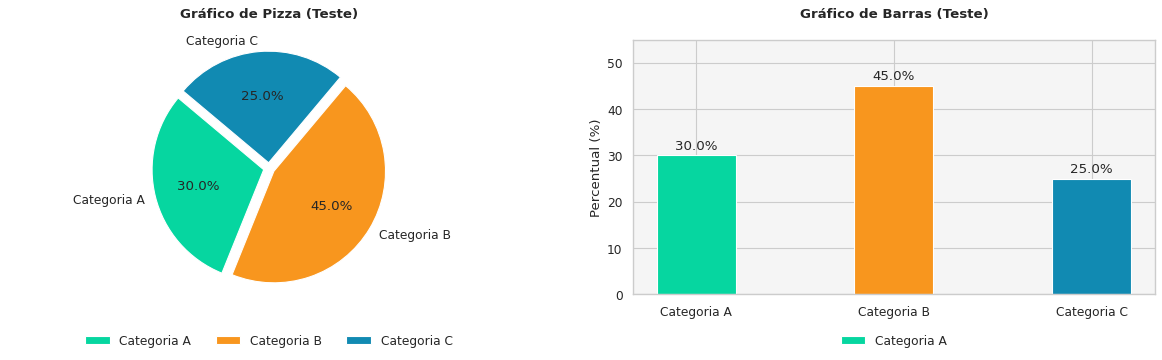

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Paleta de cores baseada em complexidade percentual
cores = {
    'urgente': {'cor': '#D90429', 'min': 90, 'max': 100},
    'alto_risco': {'cor': '#EF233C', 'min': 75, 'max': 90},
    'perigo': {'cor': '#F3722C', 'min': 60, 'max': 75},
    'atenção': {'cor': '#F8961E', 'min': 45, 'max': 60},
    'baixo_risco': {'cor': '#06D6A0', 'min': 30, 'max': 45},
    'neutro': {'cor': '#118AB2', 'min': 15, 'max': 30},
    'texto': {'cor': '#264653', 'min': 0, 'max': 15}
}

def obter_cor_por_porcentagem(porcentagem):
    for nivel, info in cores.items():
        if info['min'] <= porcentagem <= info['max']:
            return info['cor']
    if porcentagem > 100:
        return cores['urgente']['cor']
    elif porcentagem < 0:
        return cores['texto']['cor']
    return '#000000'  # Cor padrão

# Estilo Global do Projeto
plt.rcParams.update({
    'figure.figsize': (8, 6),
    'figure.dpi': 80,
    'axes.facecolor': '#F5F5F5',
    'axes.edgecolor': '#CCCCCC',
    'axes.titleweight': 'bold',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.fontsize': 10,
    'legend.loc': 'lower center',
    'legend.frameon': False,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Montserrat'],
    'savefig.facecolor': '#F5F5F5'
})

sns.set(style="whitegrid")

# 🧩 GRÁFICO DE PIZZA PADRÃO
def grafico_pizza(valores, labels, titulo, ax):
    explode = [0.05]*len(valores)
    cores_usadas = [obter_cor_por_porcentagem(p) for p in valores]

    wedges, texts, autotexts = ax.pie(
        valores,
        labels=labels,
        explode=explode,
        colors=cores_usadas,
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    ax.axis('equal')  # Forma redonda
    ax.set_title(titulo, pad=20, fontweight='bold')
    ax.legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(labels))

# 📊 GRÁFICO DE BARRAS PADRÃO (vertical)
def grafico_barras(valores, labels, titulo, ax):
    cores_usadas = [obter_cor_por_porcentagem(p) for p in valores]
    bars = ax.bar(labels, valores, color=cores_usadas, edgecolor='white', width=0.4)

    ax.set_title(titulo, pad=20, fontweight='bold')
    ax.set_ylabel('Percentual (%)')
    ax.set_ylim(0, max(valores) + 10)
    ax.bar_label(bars, fmt='%.1f%%', padding=3)
    ax.set_facecolor('#F5F5F5')
    ax.legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(labels))

# 📈 GRÁFICO DE COLUNAS PADRÃO (horizontal)
def grafico_colunas(valores, labels, titulo, ax):
    cores_usadas = [obter_cor_por_porcentagem(p) for p in valores]
    bars = ax.barh(labels, valores, color=cores_usadas, edgecolor='white', height=0.4)

    ax.set_title(titulo, pad=20, fontweight='bold')
    ax.set_xlabel('Percentual (%)')
    ax.set_xlim(0, max(valores) + 10)
    ax.bar_label(bars, fmt='%.1f%%', padding=5)
    ax.set_facecolor('#F5F5F5')
    ax.legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(labels))

# 📍 GRÁFICO DE DISPERSÃO PADRÃO
def grafico_dispersao(x, y, titulo, ax, cor='#118AB2'):
    ax.scatter(x, y, color=cor, edgecolor='black', alpha=0.7)
    ax.set_title(titulo, pad=20, fontweight='bold')
    ax.set_xlabel('Variável X')
    ax.set_ylabel('Variável Y')
    ax.set_facecolor('#F5F5F5')

# 🧠 MATRIZ DE CORRELAÇÃO PADRÃO
def grafico_correlacao(df, titulo, ax):
    corr = df.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, ax=ax)
    ax.set_title(titulo, pad=20, fontweight='bold')
    ax.set_facecolor('#F5F5F5')

# 🧩 EXEMPLO COM 3 VARIÁVEIS — TESTE PADRÃO
valores_teste = [30, 45, 25]
labels_teste = ['Categoria A', 'Categoria B', 'Categoria C']

fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Espaço lateral de ~2cm

grafico_pizza(valores_teste, labels_teste, 'Gráfico de Pizza (Teste)', axs[0])
grafico_barras(valores_teste, labels_teste, 'Gráfico de Barras (Teste)', axs[1])

plt.tight_layout(pad=4.0)  # Espaço entre gráficos ~2cm
plt.show()

## 📊 3. Carga e Análise

`3.1. Análise Descritiva`

In [ ]:
# Bloco 3.1 — Análise Descritiva das Variáveis Numéricas

# Seleção de colunas numéricas do DataFrame de trabalho
colunas_numericas = df_trabalho.select_dtypes(include=[np.number])

# Aplicação do describe para obter estatísticas básicas
tabela_descritiva = colunas_numericas.describe().T

# Função auxiliar para aplicar formatação apropriada
def formatar_estatisticas(df):
    formatacoes = {}
    for coluna in df.index:
        if "FATURAMENTO" in coluna.upper() or "RECEITA" in coluna.upper() or "ACCOUNT" in coluna.upper():
            formatacoes[coluna] = "R$ {:,.2f}".format
        else:
            formatacoes[coluna] = "{:,.2f}".format
    return df.style.format(formatacoes)

# Exibição da tabela formatada
formatar_estatisticas(tabela_descritiva)


,count,mean,std,min,25%,50%,75%,max
CHURN,7267.000000,0.257190,0.437115,0.000000,0.000000,0.000000,1.000000,1.000000
CUSTOMER.SENIORCITIZEN,7267.000000,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
CUSTOMER.TENURE,7267.000000,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
ACCOUNT.CHARGES.MONTHLY,7267.000000,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
ACCOUNT.CHARGES.TOTAL,7267.000000,2277.182035,2268.648587,0.000000,396.200000,1389.200000,3778.525000,8684.800000
EVASAO,7267.000000,0.257190,0.437115,0.000000,0.000000,0.000000,1.000000,1.000000
ACCOUNT.CONTRACT.MONTHS,7267.000000,8.815880,9.544539,1.000000,1.000000,1.000000,12.000000,24.000000
ACCOUNT.DAILY.ACCOUNT,7267.000000,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333
GRUPO_SERVICO_INTERNET,7267.000000,0.683226,0.465251,0.000000,0.000000,1.000000,1.000000,1.000000
GRUPO_SERVICO_TELEFONE,7267.000000,0.421770,0.493876,0.000000,0.000000,0.000000,1.000000,1.000000


`3.2. Distribuição da Evasão`


📊 Distribuição da Evasão de Clientes

╒═════════════════════╤══════════════╤══════════════════╕
│ Categoria_Cliente   │   Quantidade │   Percentual (%) │
╞═════════════════════╪══════════════╪══════════════════╡
│ Ativo               │         5398 │            74.28 │
├─────────────────────┼──────────────┼──────────────────┤
│ Evasão              │         1869 │            25.72 │
╘═════════════════════╧══════════════╧══════════════════╛


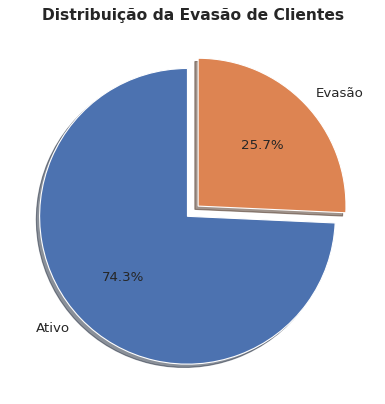

In [ ]:
from tabulate import tabulate

# Bloco 3.2.1. Exibir a distribuição da evasão de clientes com gráfico de pizza e tabela padronizada

# Contagem absoluta e percentual da evasão
distribuicao_churn = df_trabalho['CHURN'].value_counts().sort_index()
percentuais_churn = df_trabalho['CHURN'].value_counts(normalize=True).sort_index() * 100

# Criação da tabela de resumo
tabela_churn = pd.DataFrame({
    'Categoria_Cliente': ['Ativo', 'Evasão'],
    'Quantidade': distribuicao_churn.values,
    'Percentual (%)': percentuais_churn.values.round(2)
})

# Exibição da tabela formatada com tabulate (fancy_grid)
print("\n📊 Distribuição da Evasão de Clientes\n")
print(tabulate(tabela_churn, headers='keys', tablefmt='fancy_grid', showindex=False))

# Configuração do gráfico de pizza
valores = distribuicao_churn.values
labels = ['Ativo', 'Evasão']
explode = [0.05 if v > 0 else 0 for v in valores]

fig, ax = plt.subplots(figsize=(6, 6), dpi=80)  # Fundo quadrado
ax.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90,
       explode=explode, shadow=True, textprops={'fontsize': 12})
ax.set_title('Distribuição da Evasão de Clientes', fontsize=14, fontweight='bold')

plt.show()

`3.3. Contagem de Evasão por Variáveis Categóricas`

3.3.1. Analisar a evasão: CHURN = 1 em função das variáveis categóricas derivadas.
- CATEGORIA_GENERO: Female / Male
- CATEGORIA_SENIOR: Idoso / Não Idoso
- CATEGORIA_CLIENTE_TIPO: Cliente Familiar / Cliente Individual

In [ ]:
# BLOCO 3.3.1.1. Criação das variáveis derivadas + contagem de evasão (CHURN = 1)

from tabulate import tabulate

# CATEGORIA_GENERO:
df_trabalho['CATEGORIA_GENERO'] = df_trabalho['CUSTOMER.GENDER']

# CATEGORIA_SENIOR: 1 = Idoso / 0 = Não Idoso
df_trabalho['CATEGORIA_SENIOR'] = df_trabalho['CUSTOMER.SENIORCITIZEN'].apply(lambda x: 'Idoso' if x == 1 else 'Não Idoso')

# CATEGORIA_CLIENTE_TIPO: soma das variáveis binárias
df_trabalho['CATEGORIA_CLIENTE_TIPO'] = (df_trabalho['CUSTOMER.PARTNER'] + df_trabalho['CUSTOMER.DEPENDENTS']).apply(
    lambda x: 'Cliente Familiar' if x >= 1 else 'Cliente Individual'
)

# CONTAGENS DE EVASÃO POR CATEGORIA (CHURN == 1)
ev_genero = df_trabalho[df_trabalho['CHURN'] == 1]['CATEGORIA_GENERO'].value_counts().reset_index()
ev_senior = df_trabalho[df_trabalho['CHURN'] == 1]['CATEGORIA_SENIOR'].value_counts().reset_index()
ev_tipo = df_trabalho[df_trabalho['CHURN'] == 1]['CATEGORIA_CLIENTE_TIPO'].value_counts().reset_index()

# Renomear colunas
ev_genero.columns = ['Categoria', 'Evasões']
ev_senior.columns = ['Categoria', 'Evasões']
ev_tipo.columns = ['Categoria', 'Evasões']

# Exibir tabelas formatadas
print("📊 Evasão por CATEGORIA_GENERO:")
print(tabulate(ev_genero, headers='keys', tablefmt='fancy_grid'))

print("\n📊 Evasão por CATEGORIA_SENIOR:")
print(tabulate(ev_senior, headers='keys', tablefmt='fancy_grid'))

print("\n📊 Evasão por CATEGORIA_CLIENTE_TIPO:")
print(tabulate(ev_tipo, headers='keys', tablefmt='fancy_grid'))

📊 Evasão por CATEGORIA_GENERO:
╒════╤═════════════╤═══════════╕
│    │ Categoria   │   Evasões │
╞════╪═════════════╪═══════════╡
│  0 │ Female      │       939 │
├────┼─────────────┼───────────┤
│  1 │ Male        │       930 │
╘════╧═════════════╧═══════════╛

📊 Evasão por CATEGORIA_SENIOR:
╒════╤═════════════╤═══════════╕
│    │ Categoria   │   Evasões │
╞════╪═════════════╪═══════════╡
│  0 │ Não Idoso   │      1393 │
├────┼─────────────┼───────────┤
│  1 │ Idoso       │       476 │
╘════╧═════════════╧═══════════╛

📊 Evasão por CATEGORIA_CLIENTE_TIPO:
╒════╤════════════════════╤═══════════╕
│    │ Categoria          │   Evasões │
╞════╪════════════════════╪═══════════╡
│  0 │ Cliente Individual │      1123 │
├────┼────────────────────┼───────────┤
│  1 │ Cliente Familiar   │       746 │
╘════╧════════════════════╧═══════════╛


In [ ]:
# BLOCO 3.3.1.2. Cálculo do percentual de evasão por categoria

from tabulate import tabulate
import pandas as pd
import requests
import numpy as np

# --- Data Loading and Preprocessing ---
# This section is added to ensure df_trabalho is always available.

# 1. Load data from GitHub
url_github = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
response = requests.get(url_github)
if response.status_code == 200:
    data = response.json()
    df_original = pd.json_normalize(data)
    df_trabalho = df_original.copy()
else:
    # If the request fails, we can't proceed.
    raise Exception(f"Error loading data from GitHub: {response.status_code}")

# 2. Standardize column names to uppercase
df_trabalho.columns = df_trabalho.columns.str.upper()

# 3. Convert numeric columns and handle missing values
df_trabalho['ACCOUNT.CHARGES.MONTHLY'] = pd.to_numeric(df_trabalho['ACCOUNT.CHARGES.MONTHLY'], errors='coerce')
df_trabalho['ACCOUNT.CHARGES.TOTAL'] = pd.to_numeric(df_trabalho['ACCOUNT.CHARGES.TOTAL'], errors='coerce')
df_trabalho['ACCOUNT.CHARGES.TOTAL'] = df_trabalho['ACCOUNT.CHARGES.TOTAL'].fillna(0)

# 4. Perform binary conversions and create new columns
df_trabalho.replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0}, inplace=True)
df_trabalho['CHURN'] = df_trabalho['CHURN'].apply(lambda x: 1 if x == 1 else 0)
df_trabalho['EVASAO'] = df_trabalho['CHURN']

# --- Original Cell Code ---

# CATEGORIA_GENERO:
df_trabalho['CATEGORIA_GENERO'] = df_trabalho['CUSTOMER.GENDER']

# CATEGORIA_SENIOR: Idoso / Não Idoso
df_trabalho['CATEGORIA_SENIOR'] = df_trabalho['CUSTOMER.SENIORCITIZEN'].apply(lambda x: 'Idoso' if x == 1 else 'Não Idoso')

# CATEGORIA_CLIENTE_TIPO: Cliente Familiar / Cliente Individual
df_trabalho['CATEGORIA_CLIENTE_TIPO'] = (df_trabalho['CUSTOMER.PARTNER'] + df_trabalho['CUSTOMER.DEPENDENTS']).apply(
    lambda x: 'Cliente Familiar' if x >= 1 else 'Cliente Individual'
)

# Total de evasões para cálculo percentual
total_evasoes = df_trabalho[df_trabalho['CHURN'] == 1].shape[0]

# Percentuais de evasão por categoria
ev_genero = df_trabalho[df_trabalho['CHURN'] == 1]['CATEGORIA_GENERO'].value_counts(normalize=True).mul(100).round(1).reset_index()
ev_senior = df_trabalho[df_trabalho['CHURN'] == 1]['CATEGORIA_SENIOR'].value_counts(normalize=True).mul(100).round(1).reset_index()
ev_tipo = df_trabalho[df_trabalho['CHURN'] == 1]['CATEGORIA_CLIENTE_TIPO'].value_counts(normalize=True).mul(100).round(1).reset_index()

# Renomear colunas
ev_genero.columns = ['Categoria', 'Percentual de Evasão']
ev_senior.columns = ['Categoria', 'Percentual de Evasão']
ev_tipo.columns = ['Categoria', 'Percentual de Evasão']

# Exibir tabelas formatadas
print("📊 Percentual de Evasão por CATEGORIA_GENERO")
print(tabulate(ev_genero, headers='keys', tablefmt='fancy_grid'))

print("\n📊 Percentual de Evasão por CATEGORIA_SENIOR")
print(tabulate(ev_senior, headers='keys', tablefmt='fancy_grid'))

print("\n📊 Percentual de Evasão por CATEGORIA_CLIENTE_TIPO")
print(tabulate(ev_tipo, headers='keys', tablefmt='fancy_grid'))

📊 Percentual de Evasão por CATEGORIA_GENERO
╒════╤═════════════╤════════════════════════╕
│    │ Categoria   │   Percentual de Evasão │
╞════╪═════════════╪════════════════════════╡
│  0 │ Female      │                   50.2 │
├────┼─────────────┼────────────────────────┤
│  1 │ Male        │                   49.8 │
╘════╧═════════════╧════════════════════════╛

📊 Percentual de Evasão por CATEGORIA_SENIOR
╒════╤═════════════╤════════════════════════╕
│    │ Categoria   │   Percentual de Evasão │
╞════╪═════════════╪════════════════════════╡
│  0 │ Não Idoso   │                   74.5 │
├────┼─────────────┼────────────────────────┤
│  1 │ Idoso       │                   25.5 │
╘════╧═════════════╧════════════════════════╛

📊 Percentual de Evasão por CATEGORIA_CLIENTE_TIPO
╒════╤════════════════════╤════════════════════════╕
│    │ Categoria          │   Percentual de Evasão │
╞════╪════════════════════╪════════════════════════╡
│  0 │ Cliente Individual │                   60.1 │
├───

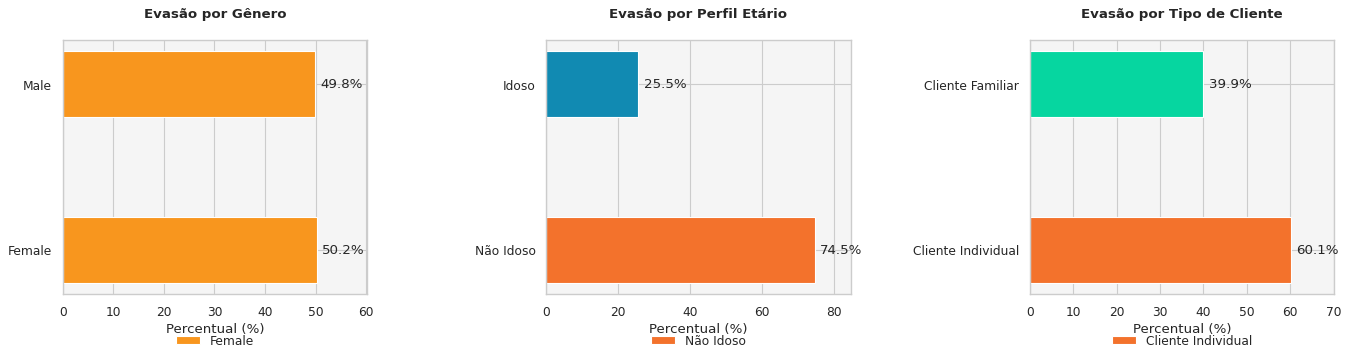

In [ ]:
# BLOCO 3.3.1.3. Contagem de Evasão por Variáveis Categóricas - Gráficos de percentual de evasão por categoria

fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Gráficos lado a lado

# Paleta de cores baseada em complexidade percentual
cores = {
    'urgente': {'cor': '#D90429', 'min': 90, 'max': 100},
    'alto_risco': {'cor': '#EF233C', 'min': 75, 'max': 90},
    'perigo': {'cor': '#F3722C', 'min': 60, 'max': 75},
    'atenção': {'cor': '#F8961E', 'min': 45, 'max': 60},
    'baixo_risco': {'cor': '#06D6A0', 'min': 30, 'max': 45},
    'neutro': {'cor': '#118AB2', 'min': 15, 'max': 30},
    'texto': {'cor': '#264653', 'min': 0, 'max': 15}
}

def obter_cor_por_porcentagem(porcentagem):
    for nivel, info in cores.items():
        if info['min'] <= porcentagem <= info['max']:
            return info['cor']
    if porcentagem > 100:
        return cores['urgente']['cor']
    elif porcentagem < 0:
        return cores['texto']['cor']
    return '#000000'  # Cor padrão

# --- GÊNERO ---
valores_genero = ev_genero['Percentual de Evasão'].tolist()
labels_genero = ev_genero['Categoria'].tolist()
grafico_colunas(valores_genero, labels_genero, 'Evasão por Gênero', axs[0])

# --- SENIOR ---
valores_senior = ev_senior['Percentual de Evasão'].tolist()
labels_senior = ev_senior['Categoria'].tolist()
grafico_colunas(valores_senior, labels_senior, 'Evasão por Perfil Etário', axs[1])

# --- TIPO DE CLIENTE ---
valores_tipo = ev_tipo['Percentual de Evasão'].tolist()
labels_tipo = ev_tipo['Categoria'].tolist()
grafico_colunas(valores_tipo, labels_tipo, 'Evasão por Tipo de Cliente', axs[2])

# Ajuste de espaçamento
plt.tight_layout(pad=4.0)  # ~2cm de espaço entre gráficos
plt.show()

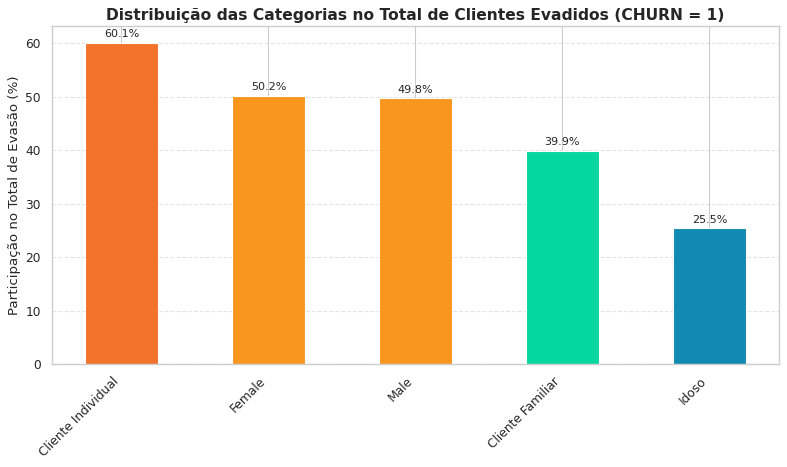

In [ ]:
# BLOCO 3.3.1.4. Contagem de Evasão por Variáveis Categóricas - Filtrar apenas clientes que evadiram (CHURN = 1)
df_evasao = df_trabalho[df_trabalho['CHURN'] == 1]

# Total de clientes que evadiram
total_churn = len(df_evasao)

# Cálculo de categorias específicas:
qtd_female = len(df_evasao[df_evasao['CUSTOMER.GENDER'] == 'Female'])
qtd_male = len(df_evasao[df_evasao['CUSTOMER.GENDER'] == 'Male'])
qtd_idoso = len(df_evasao[df_evasao['CUSTOMER.SENIORCITIZEN'] == 1])

# Cliente Familiar = cliente com PARTNER = 1 ou DEPENDENTS = 1
qtd_familiar = len(df_evasao[(df_evasao['CUSTOMER.PARTNER'] == 1) | (df_evasao['CUSTOMER.DEPENDENTS'] == 1)])
# Cliente Individual = ambos são 0
qtd_individual = len(df_evasao[(df_evasao['CUSTOMER.PARTNER'] == 0) & (df_evasao['CUSTOMER.DEPENDENTS'] == 0)])

# Criar DataFrame para visualização
dados_categoria = pd.DataFrame({
    'Categoria': ['Female', 'Male', 'Idoso', 'Cliente Familiar', 'Cliente Individual'],
    'Qtd Evasões': [qtd_female, qtd_male, qtd_idoso, qtd_familiar, qtd_individual]
})

# Calcular percentual sobre total de churns
dados_categoria['Percentual'] = (dados_categoria['Qtd Evasões'] / total_churn * 100).round(1)

# Ordenar do maior para menor
dados_categoria.sort_values(by='Percentual', ascending=False, inplace=True)

# Gerar cores
cores = [obter_cor_por_porcentagem(p) for p in dados_categoria['Percentual']]

# Gráfico
plt.figure(figsize=(10, 6))
barras = plt.bar(dados_categoria['Categoria'], dados_categoria['Percentual'], color=cores, width=0.5)

# Adicionar valores nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 1, f'{altura:.1f}%', ha='center', fontsize=10)

plt.title('Distribuição das Categorias no Total de Clientes Evadidos (CHURN = 1)', fontsize=14)
plt.ylabel('Participação no Total de Evasão (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

`4. Contagem de Evasão por Variáveis Numéricas`

Variáveis Numéricas: Faturamento Total Geral vs Evasão

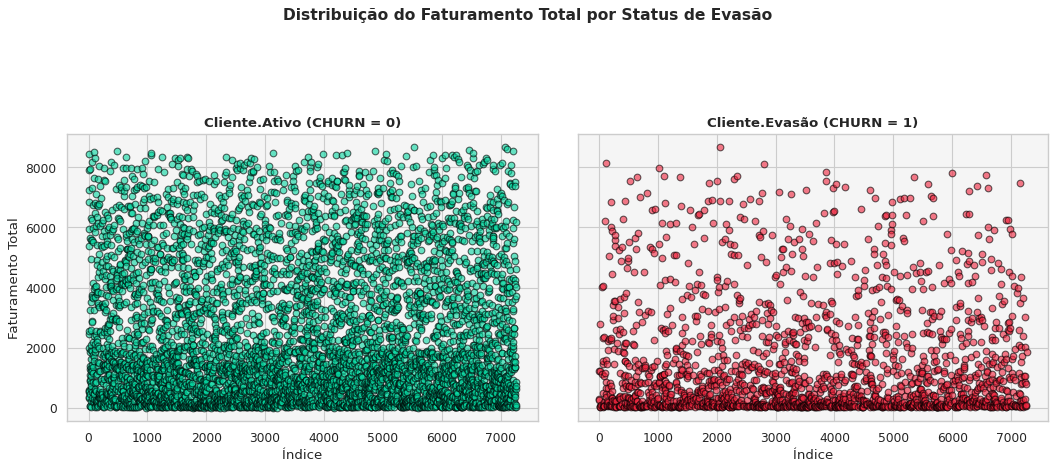

In [ ]:
# Comparação da distribuição de Faturamento Total entre Cliente.Ativo e com Evasão

import matplotlib.pyplot as plt

# Separar os dados
ativos = df_trabalho[df_trabalho['CHURN'] == 0]['ACCOUNT.CHARGES.TOTAL']
evasao = df_trabalho[df_trabalho['CHURN'] == 1]['ACCOUNT.CHARGES.TOTAL']

# Criar a figura com dois subgráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico para Cliente.Ativo
axs[0].scatter(ativos.index, ativos, color='#06D6A0', alpha=0.6, edgecolor='black')
axs[0].set_title('Cliente.Ativo (CHURN = 0)', fontweight='bold', fontsize=12)
axs[0].set_xlabel('Índice')
axs[0].set_ylabel('Faturamento Total')
axs[0].set_facecolor('#F5F5F5')

# Gráfico para Cliente.Evasão
axs[1].scatter(evasao.index, evasao, color='#EF233C', alpha=0.6, edgecolor='black')
axs[1].set_title('Cliente.Evasão (CHURN = 1)', fontweight='bold', fontsize=12)
axs[1].set_xlabel('Índice')
axs[1].set_facecolor('#F5F5F5')

# Título geral e layout
fig.suptitle('Distribuição do Faturamento Total por Status de Evasão', fontsize=14, fontweight='bold', y=1.03)
plt.tight_layout(pad=3)
`Interpretação Resumida`

*Distribuição do Faturamento Total por Status de Evasão*

Distribuição dos Pontos
- Clientes Ativos: sugere uma base de clientes ativos com diferentes níveis de faturamento.
- Clientes com Evasão: maior concentração está em valores muito baixos de faturamento, até 1.000.plt.show()

`Interpretação Resumida`

*Gráfico Subplot Duplo - facilita a comparação direta*.

*Distribuição do Faturamento Total por Status de Evasão*

Distribuição dos Pontos
- Clientes Ativos: sugere uma base de clientes ativos com diferentes níveis de faturamento.
- Clientes com Evasão: maior concentração está em valores muito baixos de faturamento, até 1.000.

5. Análise de Correlação entre Variáveis`

 - A relação entre a ACCOUNT.DAILY.ACCOUNT vs Churn = 1
 - A relação entre as Categorias: Internet e telefone vs Churn = 1

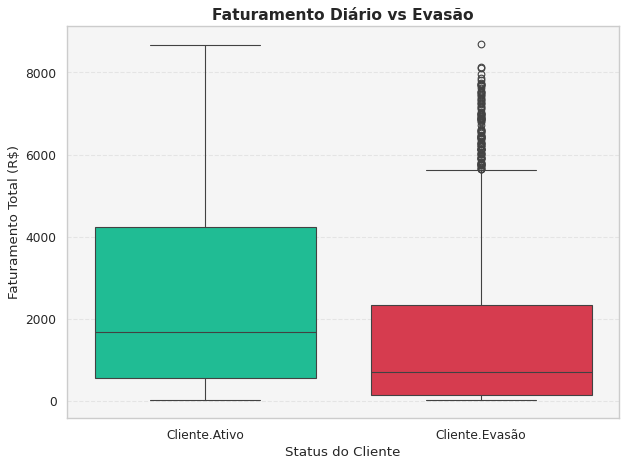

In [ ]:
# 3.5.1. Análise de Correlação entre variáveis
# A relação entre a ACCOUNT.DAILY.ACCOUNT vs Churn = 1
import seaborn as sns
import matplotlib.pyplot as plt

# Criar DataFrame auxiliar
df_plot = df_trabalho[['ACCOUNT.CHARGES.TOTAL', 'CHURN']].copy()
df_plot['STATUS_CLIENTE'] = df_plot['CHURN'].apply(lambda x: 'Cliente.Ativo' if x == 0 else 'Cliente.Evasão')

# Criar o boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_plot,
    x='STATUS_CLIENTE',
    y='ACCOUNT.CHARGES.TOTAL',
    hue='STATUS_CLIENTE',
    palette={'Cliente.Ativo': '#06D6A0', 'Cliente.Evasão': '#EF233C'},
    dodge=False
)

# Estilo do gráfico
plt.title('Faturamento Diário vs Evasão', fontsize=14, fontweight='bold')
plt.xlabel('Status do Cliente')
plt.ylabel('Faturamento Total (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.gca().set_facecolor('#F5F5F5')

plt.tight_layout()
plt.show()

Interpretação Resumida`

Gráfico Boxplot - diagrama de caixa, comparan a distribuição de          ACCOUNT.CHARGES.TOTAL

*Faturamento Diário vs Evasão*

Cliente.Ativo: alto faturamento é muito maior entre os que não evadiram.

Cliente.Evasão: menor faturamento, a concentração na base IQR menor e mediana baixa indica menor engajamento financeiro.

Outliers em evasão: poucos clientes que evadiram tinham faturamentos elevados.

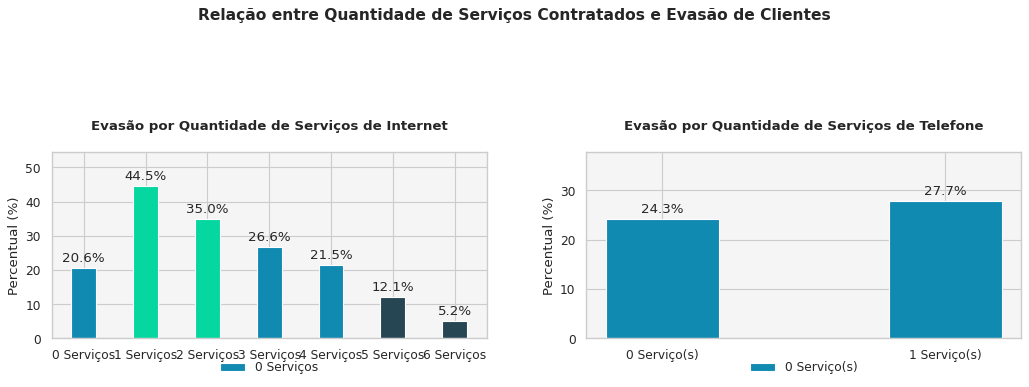

Correlação entre QTD_SERVICOS_INTERNET e CHURN: -0.08
Correlação entre QTD_SERVICOS_TELEFONE e CHURN: 0.04


In [ ]:
# 2.5.2. Análise de Correlação entre Variáveis
# A relação entre as Categorias: Internet e telefone vs Churn = 1

# 1. Criar colunas com contagem de serviços por grupo
df_trabalho['QTD_SERVICOS_INTERNET'] = df_trabalho[COLUNAS_INTERNET].sum(axis=1)
df_trabalho['QTD_SERVICOS_TELEFONE'] = df_trabalho[COLUNAS_TELEFONE].sum(axis=1)

# 2. Calcular correlação com CHURN
corr_internet = df_trabalho[['QTD_SERVICOS_INTERNET', 'CHURN']].corr().iloc[0,1]
corr_telefone = df_trabalho[['QTD_SERVICOS_TELEFONE', 'CHURN']].corr().iloc[0,1]

# 3. Agrupar e calcular taxas de churn por quantidade de serviços contratados
internet_churn = df_trabalho.groupby('QTD_SERVICOS_INTERNET')['CHURN'].mean().reset_index()
telefone_churn = df_trabalho.groupby('QTD_SERVICOS_TELEFONE')['CHURN'].mean().reset_index()

# 4. Converter para percentual
internet_churn['CHURN'] = internet_churn['CHURN'] * 100
telefone_churn['CHURN'] = telefone_churn['CHURN'] * 100

# 5. Gráfico comparativo lado a lado com padrão visual
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico: Serviços de Internet vs Churn
grafico_barras(
    valores=internet_churn['CHURN'].tolist(),
    labels=[f'{int(v)} Serviços' for v in internet_churn['QTD_SERVICOS_INTERNET']],
    titulo='Evasão por Quantidade de Serviços de Internet',
    ax=axs[0]
)

# Gráfico: Serviços de Telefone vs Churn
grafico_barras(
    valores=telefone_churn['CHURN'].tolist(),
    labels=[f'{int(v)} Serviço(s)' for v in telefone_churn['QTD_SERVICOS_TELEFONE']],
    titulo='Evasão por Quantidade de Serviços de Telefone',
    ax=axs[1]
)

plt.suptitle('Relação entre Quantidade de Serviços Contratados e Evasão de Clientes', fontsize=14, fontweight='bold')
plt.tight_layout(pad=4.0)
plt.show()

# 6. Exibir correlações
print(f"Correlação entre QTD_SERVICOS_INTERNET e CHURN: {corr_internet:.2f}")
print(f"Correlação entre QTD_SERVICOS_TELEFONE e CHURN: {corr_telefone:.2f}")

`Interpretação Resumida`

Relação entre os serviços contratados e Cliente.Evasão. Categorizados em um Grupo denominado: Internet e Telefone

- Categoria Internet: `-0.08`	Fraca, mas negativa – mais serviços de internet, menos churn.
- Categoria Telefone: `+0.04`	Muito fraca, mas positiva – mais serviços de telefone, levemente mais churn.

##🧾4. Relatório Final

# 📘 1. Introdução

Esta análise tem como objetivo entender os fatores que levam à **evasão de Clientes** em uma empresa de telecomunicações.  
A evasão de clientes resulta na **perda de receita** e impacto direto no crescimento do negócio.  
Através da análise de dados históricos, procuramos reconhecer padrões de comportamento que sinalizem **risco de evasão**, permitindo a adoção de **ações estratégicas de retenção**.

---

# 🩹 2. Limpeza e Tratamento de Dados

As etapas de preparação incluíram:

✅ **Importação dos dados** via API GitHub.

✅ **Padronização** dos nomes de colunas.

✅ **Remoção de colunas irrelevantes**.

✅ **Substituição de valores inconsistentes**, como "No internet service" e "No phone service" por 0.

✅ **Conversão de variáveis categóricas Yes/No em binárias (1/0)**.

✅ **Criação de variáveis derivadas**, como:
  - `ACCOUNT.DAILY.ACCOUNT`: cálculo do valor diário pago.
  - `CATEGORIA_CLIENTE`: classificação entre Cliente.Ativo e Cliente.Evasão.
  - `EVASÃO`: flag binária baseada na coluna `CHURN`.

---

# 📊 3. Análise Exploratória de Dados

Foram aplicadas análises sobre variáveis relevantes, com apoio de gráficos:

### 3.1 Distribuição de Evasão

- Utilização de **gráfico de pizza** e **tabela padronizada** para representar `CHURN`:
  - `Cliente.Ativo`
  - `Cliente.Evasão`

### 3.2 Perfil por Variáveis Categóricas

- Análise da evasão em função das seguintes variáveis derivadas:
  - `CATEGORIA_GENERO`: Female / Male  
  - `CATEGORIA_SENIOR`: Idoso / Não Idoso  
  - `CATEGORIA_CLIENTE_TIPO`: Cliente Familiar / Cliente Individual

### 3.3 Faturamento Total x Evasão

- Comparação entre **Faturamento Total Acumulado** e status de evasão:
  - `Cliente.Ativo`
  - `Cliente.Evasão`

### 3.4 Correlação entre Serviços e Evasão

- Cálculo de correlação entre número de serviços e a evasão:
  - Categoria Internet
  - Categoria Telefone

---

# 📌 4. Visão Geral da Base de Clientes

- **Cliente.Ativo:** 74,3%  
- **Cliente.Evasão:** 25,7%

### Dentro do grupo evadido:
- **Cliente.Individual:** 60,1%  
- **Mulheres (Cliente.Female):** 49,8%

---

# 👤 5. Perfil dos Clientes com Maior Evasão

- **Tipo de Contrato:**  
  Clientes com **Contrato Mensal** concentram a maior evasão.

- **Categoria de Cliente:**  
  Clientes **Individuais**, especialmente **mulheres**, apresentam maior propensão à evasão.

---

# 💰 6. Análise de Faturamento x Evasão

## Gráfico Subplot Duplo: Distribuição do Faturamento Total

- Clientes com **Contrato Mensal** apresentam menor faturamento total e maior frequência de evasão.

## Gráfico Boxplot: Faturamento Diário

![Boxplot Faturamento Diário](Imagens/Imagem_Resultado da Análise_Gráfico Boxplot_ Relatório Final.jpg)

### Tabela Comparativa Cliente Ativo vs Evasão

| Indicador             | Cliente.Ativo | Cliente.Evasão | Diferença |
|-----------------------|----------------|-----------------|-----------|
| Mediana               | 21,18%         | 10,59%          | ↓ 10,6 p.p |
| IQR (mínimo)          | 7,06%          | 2,35%           | ↓ 4,7 p.p  |
| IQR (máximo)          | 49,41%         | 25,88%          | ↓ 23,5 p.p |
| Valor Máximo (sem outliers) | 100%     | 64,71%          | ↓ 35,3 p.p |

### Interpretação:

Análise através do gráfico Boxplot - diagrama de caixa  
A mediana de faturamento dos clientes que permaneceram é mais que o dobro da mediana dos que evadiram.  

Clientes ativos têm faturamento muito mais distribuído até o topo da escala (100%), enquanto os que evadiram raramente passam de 65% do potencial de faturamento máximo.  

A dispersão também é muito maior entre clientes ativos, o que reforça a importância de identificar e manter clientes com alto valor de receita.

---

# 🔌 7. Relação entre Serviços Contratados e Evasão

### 📡 Categoria: Internet  
- Correlação **negativa fraca**: **-0,08**  
- **Quanto mais serviços o cliente possui, menor a evasão**  
**→ Recomendação:** Incentivar pacotes e combos.

### ☎️ Categoria: Telefone  
- Correlação **positiva fraca**: **+0,04**  
- Pode indicar **perfil mais volátil**, mas sem padrão forte.

---

# 🧠 8. Recomendações Estratégicas

Com base nos dados analisados, recomendamos:

1. **Reformulação dos Contratos Mensais**  
   Criar programas de fidelização e **bônus por permanência**.

2. **Ações Focadas em Clientes de Baixo Faturamento Diário**  
   Desenvolver **ofertas personalizadas** e **comunicação segmentada**.

3. **Promoção de Pacotes de Serviços Integrados (Internet)**  
   Estimular a adesão a múltiplos serviços reduz a evasão.

4. **Revisão do Portfólio Telefônico**  
   Avaliar o **valor percebido pelo cliente** e otimizar o portfólio.

5. **Monitoramento Ativo de Grupos de Risco**  
   Criar alertas para **perfis críticos** (individuais, mulheres, contrato mensal).

6. **Criação de Painel de Indicadores de Churn**  
   Implementar painel com **KPIs periódicos** para decisões preditivas e ágeis.
